** Etivity 3**

**Student Name:** Ganapathy

**Student ID: **18202799


In [0]:
## NOTE: This is Python 3 code.
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0
 
from sklearn import manifold
from sklearn import cluster 
from google.colab import files
import io
import seaborn as sns

In [6]:
uploaded = files.upload()

Saving loans_dataset_et3.csv to loans_dataset_et3.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['loans_dataset_et3.csv']))

In [10]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


In [12]:
df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
327,5417,4196.0,267,360,1
328,16666,0.0,275,360,1
329,10750,0.0,312,360,1
330,5955,5625.0,315,360,1
331,6133,3906.0,324,360,1


In [14]:
df.shape

(332, 5)

In [18]:
#########################
#
# Perform PCA on the data
#
#########################
# First center and scale the data
scaled_data = preprocessing.scale(df.T)
print(scaled_data)

[[ 1.23054826  1.99531418  1.99834205 ...  1.99873179  1.28301174
   1.62535377]
 [ 1.21601287 -0.56255416 -0.53365587 ... -0.53940778  1.16217326
   0.71776066]
 [-0.81552038 -0.49492698 -0.50898955 ... -0.46574271 -0.78222777
  -0.74205009]
 [-0.73856836 -0.37527887 -0.42265742 ... -0.45440962 -0.7657498
  -0.72737862]
 [-0.89247239 -0.56255416 -0.53303921 ... -0.53917168 -0.89720742
  -0.87368573]]


In [19]:
df.describe

<bound method NDFrame.describe of      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               2483        2466.000000          90               180   
1               4917           0.000000         130               360   
2               4106           0.000000          40               180   
3               3859        3300.000000         142               180   
4               6417           0.000000         157               180   
5              14583           0.000000         185               180   
6               9328           0.000000         188               180   
7               9323        7873.000000         380               300   
8               4885           0.000000          48               360   
9               3975        2531.000000          55               360   
10              2507           0.000000          56               360   
11              2213           0.000000          66               360   
12              2

In [21]:
df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

ApplicantIncome


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


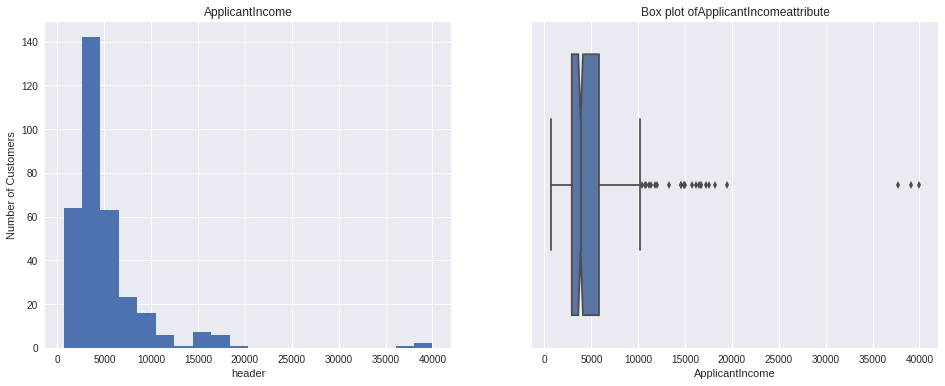

CoapplicantIncome


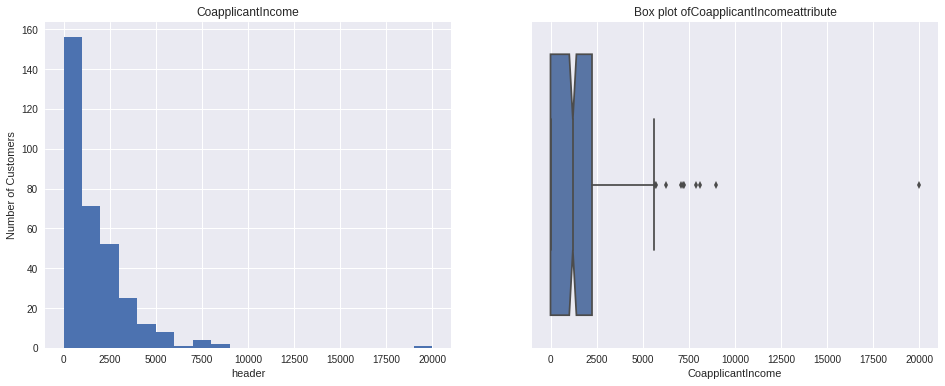

LoanAmount


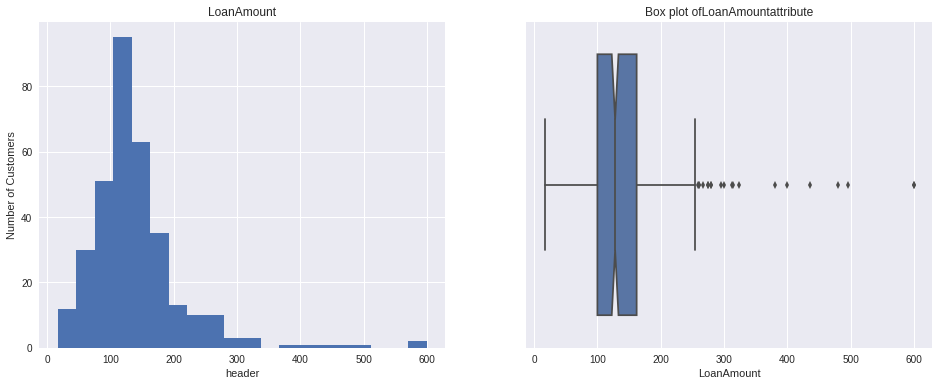

Loan_Amount_Term


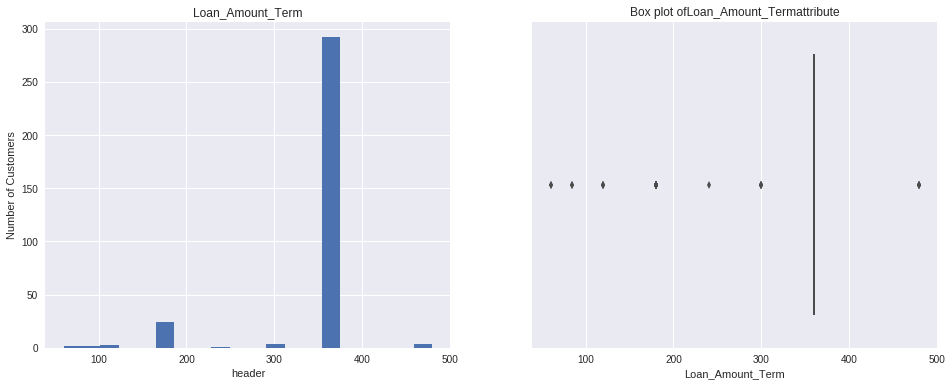

Credit_History


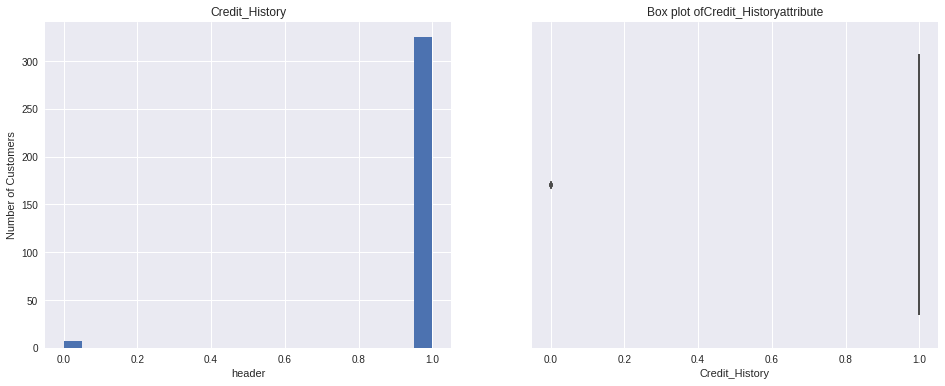

In [28]:
headers = df.dtypes.index
for header in headers:
  print(header)
  # Create two subplots for balance attribute
  plt_fig = plt.figure(figsize=(16,6))

  # Plot for balance
  axis1 = plt_fig.add_subplot(1, 2, 1)
  axis1.set_title(header)
  axis1.set_xlabel('header')
  axis1.set_ylabel('Number of Customers')
  df[header].hist(bins=20)

  axis2 = plt_fig.add_subplot(1, 2, 2)
  sns.boxplot(x=header, data=df, notch=True)
  axis2.set_title("Box plot of" + header + "attribute")

  plt.show()

### Task 1 (CS5062)
Cluster loans_dataset_et3.csv with the k-Means clustering algorithm and visualise the clustering. Use an appropriate feature-scaling technique and pick a value of k suggested by MDS and t-SNE visualisations of the dataset. Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters (max 250 words).

# Check if there are any outlier as it may affect the scaling algorithm

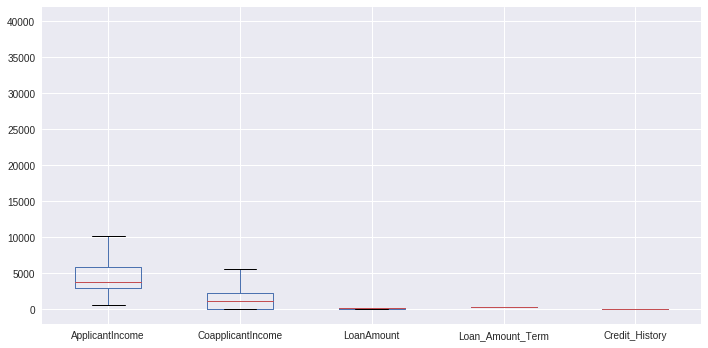

In [29]:
df.boxplot(figsize=(10,5))

plt.tight_layout()
plt.show()